# Aprendizaje, generalización y sobreajuste
## Validación cruzada (cross-validation)

# 1 Elementos del Aprendizaje: Modelo de aprendizaje

Para que un problema sea adecuado para su resolución mediante técnicas de aprendizaje automático, debe cumplir inicialmente tres condiciones:

- Debe existir un patrón, el cual queremos aprender a través de las técnicas de aprendizaje adecuadas.
- No debe existir solución analítica a nuestro problema o, de existir, debe ser complicada de obtener por medios analíticos.
- Debe existir una base de datos suficiente para poder inferir el patrón de ellos.

De las tres condiciones anteriores, realmente la fundamental es la existencia de datos para alimentar el algoritmo de aprendizaje ya que, en ausencia de las otras dos condiciones las técnicas podrían aplicarse igualmente a pesar de que tuviese más o menos sentido hacerlo.

Partiendo de la definición de aprendizaje introducida -procedimiento (automático) por el cual se construye/ajusta un modelo particular (de la familia de modelos posibles) a partir de un conjunto de datos de entrenamiento que se considera representativo de la distribución que se quiere modelar-, nuestro modelo de aprendizaje viene dado por el **algoritmo usado** para aprender el patrón y la familia de **funciones** y **datos** que utilicemos para aproximar el patrón a aprender. De este modo, el proceso de aprendizaje dependerá de estos tres elementos, los cuales establecerán nuestras limitaciones e incertidumbres a la hora tanto de aprender el patrón como de realizar predicciones con el patrón aprendido.

# 2 Generalización y sobreajuste

Recordemos que el objetivo principal del modelo aprendido es que tenga la capacidad de generalizar, es decir, la capacidad de funcionar bien para nuevos datos que no forman parte de la muestra de entrenamiento (por ejemplo, una muestra de datos de test). En caso contario, diremos que el modelo está sobreajustado a la muestra de entrenamiento. Un ejemplo viene dado por la aproximación de una función que pase por N puntos. A nivel teórico, dados N puntos existe un polinomio de grado N-1 el cual pasa por los N puntos. Por lo tanto, dicho polinomio P(x) tendrá error 0 para la muestra dada. Sin embargo, si consideramos otra muestra independiente la probabilidad de que dicha muestra quede ajustada por el polinomio obtenido es 0 ya que sólo existe un caso (que la función que quiero ajustar sea P(x)) favorable de todos los polinomios de grado N-1 que puedo construir (infinitos). Por lo tanto, aún habiendo obtenido una solución con error 0 para el conjunto de entrenamiento, dicha solución carece de capacidad de generalización.

**La introducción de grados de libertad en la familia de funciones consideradas en el aprendizaje suele dar lugar a modelos sobreajustados**, por lo que suele ser conveniente partir de los modelos más simples e ir introduciendo grados de libertad progresivamente si fuera necesario.

Teniendo en cuenta que sólo podemos evaluar el error de nuestro modelo aprendido en la muestra de entrenamiento, **¿cómo analizar el sobreajuste del modelo?**

Mediante **técnicas de validación cruzada y técnicas de remuestreo o bootstraping**

La validación cruzada se basa en separar la muestra en dos conjuntos disjuntos, uno de entrenamiento y otro de test, que permita analizar tanto el error muestral como la capacidad de generalización de nuestro modelo aprendido en la fase de entrenamiento a través del conjunto de test.

En esta práctica utilizaremos:
- Modelo de aprendizaje:Regresión lineal
- Dataset: Auto (paquete ISLR)
- Validación: Error Medio Absoluto (MAE) y Error Cuadrático Medio (MSE)
- Librerías de R:

# 3 Carga y transformación de datos

El dataset Auto (paquete ISLR) contiene información sobre las características de 392 vehículos. Cárgalo en tu sesión de R y échale un vistazo preliminar para familiarizarte con él.

In [2]:
library(ISLR)

In [3]:
data(Auto)
str(Auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


Para esta práctica sólo nos interesa la relación entre el peso (weight) y la potencia (horsepower). En concreto, nuestro objetivo será crear modelos de regresión que nos permitan predecir el peso en función de la potencia.

Para trabajar más cómodamente, comienza por convertir las libras a kg (1libra = 0.453592kg). A continuación, haz un scatter plot de una variable frente a otra (puedes utilizar, por ejemplo, la función pairs). ¿Se puede extraer alguna conclusión a primera vista?

In [4]:
?Auto
# Conversion de libras a Kg
Auto$weight <- Auto$weight * 0.453592

Auto                   package:ISLR                    R Documentation

_A_u_t_o _D_a_t_a _S_e_t

_D_e_s_c_r_i_p_t_i_o_n:

     Gas mileage, horsepower, and other information for 392 vehicles.

_U_s_a_g_e:

     Auto
     
_F_o_r_m_a_t:

     A data frame with 392 observations on the following 9 variables.

     'mpg' miles per gallon

     'cylinders' Number of cylinders between 4 and 8

     'displacement' Engine displacement (cu. inches)

     'horsepower' Engine horsepower

     'weight' Vehicle weight (lbs.)

     'acceleration' Time to accelerate from 0 to 60 mph (sec.)

     'year' Model year (modulo 100)

     'origin' Origin of car (1. American, 2. European, 3. Japanese)

     'name' Vehicle name

     The orginal data contained 408 observations but 16 observations
     with missing values were removed.

_S_o_u_r_c_e:

     This dataset was taken from the StatLib library which is
     maintained at Carnegie Mellon University. The dataset 

Comenzamos con un análisis preliminar de nuestros datos:

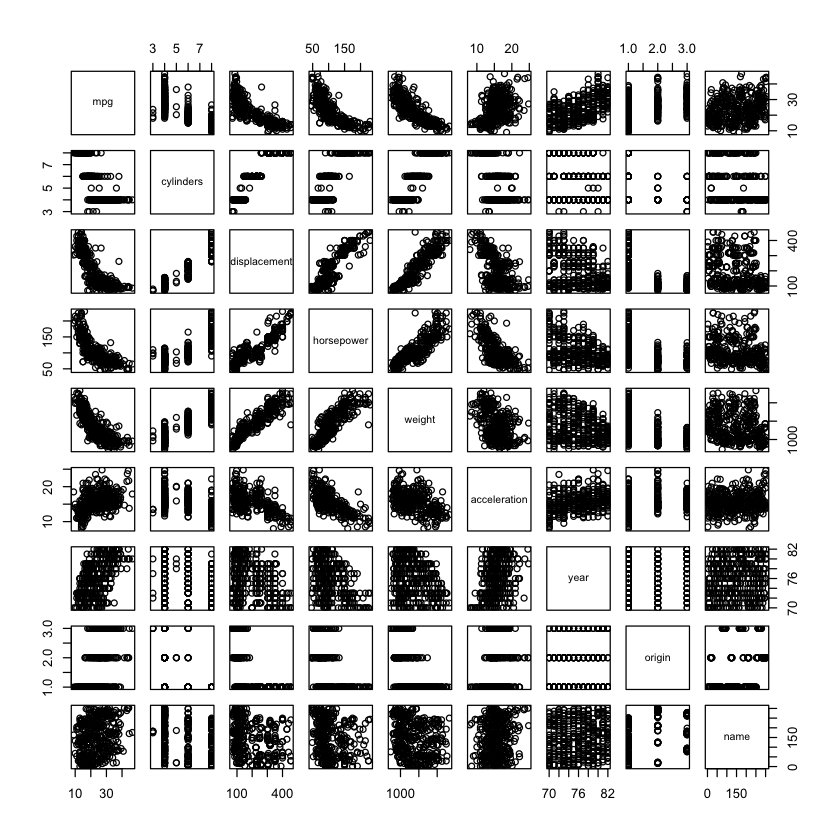

In [5]:
pairs(Auto)

En este ejemplo solo nos interesa la relación entre el peso (weight) y la potencia (horsepower).

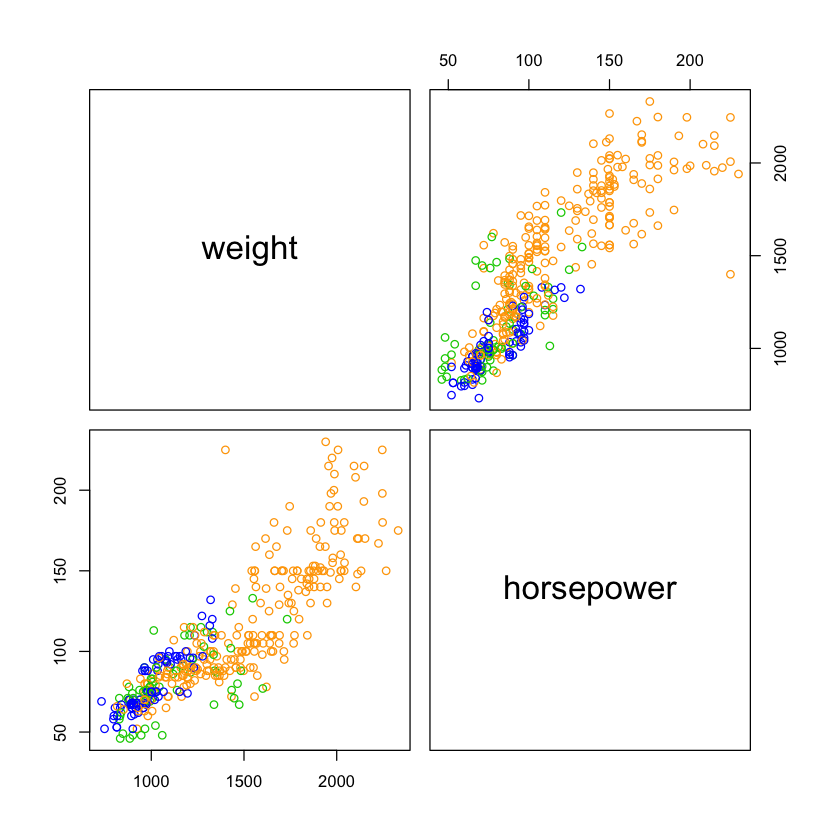

In [6]:
pairs(weight ~ horsepower, data = Auto, col = c("orange", "green3", "blue")[unclass(Auto$origin)])

Imaginemos que una empresa X nos proporciona únicamente los registros o datos europeos para que obtengamos un modelo capaz de estimar los pesos de los coches americanos en función de la potencia.

In [7]:
Auto$origin <- as.character(
                  factor(Auto$origin, 
                         labels = c("American", "Japanese", "European")))
# muestra de test
america <- Auto[Auto$origin == "American", ]
# muestra de train
europe <- Auto[Auto$origin == "European", ]
# coches japoneses
japan <- Auto[Auto$origin == "Japanese", ]

Visualicemos ambos conjuntos:

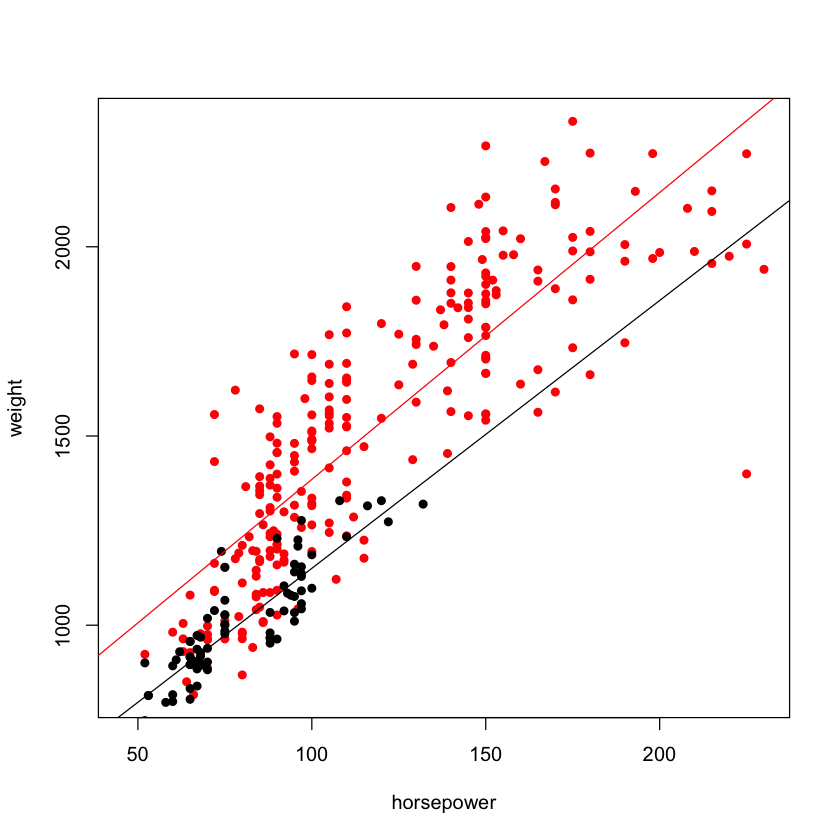

In [8]:
plot(america$horsepower, america$weight, 
     xlab = "horsepower", ylab = "weight",
     pch = 16, col = "red",
     xlim = range(Auto$horsepower))
points(europe$horsepower, europe$weight, pch = 16)
# La función `lm` realiza el ajuste de un modelo lineal entre ambas variables:
abline(lm(weight~horsepower, data = america), col = "red")
abline(lm(weight~horsepower, data = europe))

# 4 Definición de las funciones de error

Este modo de definir funciones es bastante útil en R.

In [9]:
# Functions
mae <- function(obs, est) {
  mean(abs(obs - est))
}

rmse <- function(obs, est) {
  sqrt(mean((obs - est)^2))
}

# 5 Modelización y evaluación

Como hemos dicho, trabajaremos en esta práctica con un modelo lineal (una simple regresión). Utiliza la función lm (paquete stats) para encontrar los coeficientes de una regresión lineal del tipo peso=peso(potencia) en el dataset de coches europeos. A continuación, dibuja en la misma figura la nube de puntos del dataset y la recta de ajuste que acabas de obtener. Utiliza para ello la función abline.

La función lm realiza el ajuste de un modelo lineal entre ambas variables:

Como hemos dicho, trabajaremos en esta práctica con un modelo lineal (una simple regresión). Utiliza la función `lm` (paquete `stats`) para encontrar los coeficientes de una regresión lineal del tipo peso = peso(potencia) en el dataset de coches europeos. A continuación, dibuja en la misma figura la nube de puntos del dataset y la recta de ajuste que acabas de obtener. Utiliza para ello la función `abline`.

In [10]:
# Salida de la regresion
reg <- lm(weight~horsepower, data = europe) 
summary(reg)


Call:
lm(formula = weight ~ horsepower, data = europe)

Residuals:
    Min      1Q  Median      3Q     Max 
-199.19  -51.62   -3.39   40.93  228.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 442.4491    37.8077   11.70   <2e-16 ***
horsepower    7.0781     0.4623   15.31   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 72.76 on 77 degrees of freedom
Multiple R-squared:  0.7527,	Adjusted R-squared:  0.7495 
F-statistic: 234.4 on 1 and 77 DF,  p-value: < 2.2e-16


A continuación, dibuja en la misma figura la nube de puntos del dataset y la recta de ajuste que acabas de obtener. Utiliza para ello la función `abline`.

Podemos extraer los “fitted values” de `reg`, es decir, el resultado de la applicación del modelo ajustado a los propios datos de entrenamiento `yest`, para comparar la estimación (o predicción) del modelo con los datos reales (observados).

In [11]:
yest <- reg$fitted.values

—Nota: Lo que obtenemos en la linea anterior es lo mismo que utilizar nuestro modelo para predecir el weight en base a la horsepower que se utilizo en el proceso de entrenamiento:

In [12]:
yest <- predict(object = reg, newdata = data.frame(horsepower = europe$horsepower))

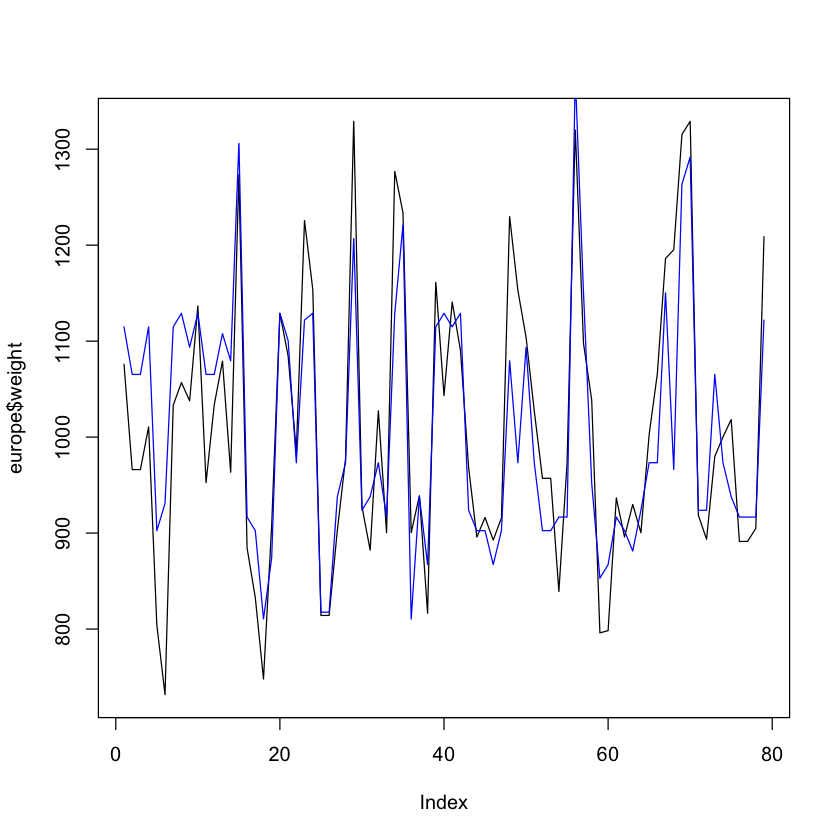

In [13]:
plot(europe$weight, type = 'l')
lines(yest, col = 'blue')

Por último calculamos el MAE y el MSE:

In [14]:
mae(obs = europe$weight, yest)

[1] 55.00146

In [15]:
rmse(obs = europe$weight, yest)

[1] 71.83323

In [16]:
cor(europe$weight, yest, method = "spearman")

[1] 0.8813537

En este primer ejemplo hemos utilizado como conjunto de validación el mismo sobre el que habíamos entrenado el modelo. Por tanto, no podemos estimar su capacidad de generalización.

Si la validación se realiza sobre un subconjunto independiente de la muestra utilizada para el entrenamiento (es decir, en modo cross-validación), el error cometido será mayor. Sin embargo, esta metodología nos permitirá estimar la capacidad de generalización del método. A continuación, vamos a ilustrar esto con distintos ejemplos.

## 5.1 Modelización y validación hold out

El modo más básico de analizar el error de mi modelo es dividiendo la muestra en subconjuntos disjuntos (hold out). En este primer caso consideraremos sólo dos conjuntos, uno de train y otro de validación con la mitad de datos (instancias, i.e. filas) en cada uno.

Para este primer ejemplo vamos a dividir los coches europeos en dos subconjuntos de igual tamaño, con la particularidad de que el primero (segundo) de esos subconjuntos contendrá la mitad de coches con potencias menores (mayores). Utiliza los coches de menor potencia para entrenar una regresión lineal y utiliza el modelo que obtengas para predecir el peso de los coches con 1) potencias menores (propio conjunto de training) y 2) potencias mayores. Calcula el RMSE en ambos casos. ¿Qué conclusión obtienes?

In [17]:
## Introduce el codigo

Aplicamos de nuevo la funciones lm (para ajustar el modelo) y predict (para aplicar el modelo sobre los datos de “train” y de “validación”) y calculamos el RMSE:

In [18]:
reg0 <- lm(weight~horsepower, data = europe.train)
yest0.train <- predict(reg0, newdata = data.frame(horsepower = europe.train$horsepower))
yest0.val <- predict(reg0, newdata = data.frame(horsepower = europe.val$horsepower))
rmse(europe.train$weight, yest0.train)

ERROR: Error in eval(mf, parent.frame()): object 'europe.train' not found


In [19]:
rmse(europe.val$weight, yest0.val)

ERROR: Error: object 'europe.val' not found


Hemos entrenado con los valores de horsepower menores, por lo que **nuestra muestra no es representativa de la población**.

### 5.1.1 Muestreo aleatorio para obtener las muestras de train y de validación

Lógicamente, los resultados sobre el conjunto de validación en el ejercicio anterior son malos porque la muestra que hemos utilizado para el entrenamiento no es representativa de la población (y en particular, de la muestra de validación). Para tratar de minimizar este tipo de problema, una solución es aleatorizar la selección train/validación.

Vuelve a realizar el mismo ejercicio pero escogiendo aleatoriamente la mitad del dataset para training y la otra mitad para validación (utiliza la función sample para ello). ¿Cómo han cambiado los resultados? En este caso, ¿dirías que el modelo que has construido está sobreajustado?

In [20]:
## Introduce el codigo

Aplicamos de nuevo la funciones `lm` (para ajustar el modelo) y `predict` (para aplicar el modelo sobre los datos de “train” y de “validación”) y calculamos el RMSE:

In [21]:
reg1 <- lm(weight~horsepower, data = europe.train)
yest1.train <- predict(reg1, newdata = data.frame(horsepower = europe.train$horsepower))
yest1.val <- predict(reg1, newdata = data.frame(horsepower = europe.val$horsepower))
rmse(europe.train$weight, yest1.train)

ERROR: Error in eval(mf, parent.frame()): object 'europe.train' not found


In [22]:
rmse(europe.val$weight, yest1.val)

ERROR: Error: object 'europe.val' not found


Al considerar una muestra representativa de la variabilidad de la población el error de validación es más bajo y se asemeja más al error de train que en el ejemplo anterior.

**El modelo entrenado con una muestra aleatoria de `europe` tiene más capacidad de generalización**

Ya que:

Decimos que existe sobreajuste cuando el error de train y el de validación son muy diferentes. Un modelo con capacidad de generalización, no sobreajustado, es aquel para el que ambos errores, en la muestra de entrenamiento y de test, son similares/comparables.

A pesar de ello, esta metodología tiene dos inconvenientes potenciales:

- 1.- La estimación del error en el conjunto de test puede variar mucho en función de la partición considerada.


In [ ]:
plot(europe$horsepower, europe$weight, pch = "*")
for (i in c(1:5)) {
  ind <- sample(1:n, ceiling(n/2))
  europe.train.i <- europe[ind, ]
  europe.val.i <- europe[-ind, ]
  reg.i <- lm(weight~horsepower, data = europe.train.i)
  yest.val.i <- predict(reg.i, data.frame(horsepower = europe.val.i$horsepower))
  abline(reg.i)
  print(rmse(europe.val.i$weight, yest.val.i))
}

- 2.- El error de validación puede ser sobreestimado. Dado que el modelo se entrena en un subconjunto de la muestra y que los métodos estadísticos suelen comportarse peor cuando son entrenados con pocos datos (n/2 = 40 en los ejemplos anteriores), esto puede dar lugar a una sobrestimación del error de validación respecto al obtenido considerando toda la muestra.
La validación cruzada (cross-validación) que aplicaremos un poco más adelante considera estos dos problemas.

Repite el ejercicio anterior (cross-validation hold-out) para 20 particiones aleatorias train/validation distintas (para ello, programa un bucle). ¿Cómo se distribuyen los errores (RMSE) sobre la muestra de validación?



In [ ]:
## Introduce el codigo

Por otro lado, en conjuntos de datos pequeños como el de este ejemplo (n/2 < 40), la cross-validación hold-out puede dar lugar a una sobrestimación del error de validación (cualquier método estadístico tiende a proporcionar peores resultados cuando se trabaja con pocos datos).

Los métodos de cross-validación leave-one-out y k-fold surgen para aliviar estos dos problemas.

## 5.2 Modelización y cross-validación leave-one-out

Como alternativa al muestreo aleatorio existe el método de validación cruzada denominado leave-one-out:

- La selección de la muestra de entrenamiento NO se hace aleatoriamente, eliminando la variabilidad del error de validación.

- La muestra de entrenamiento es la mayor posible que considera una muestra de validación.

- Si un conjunto de datos tiene N registros, el ajuste del modelo se realiza con N - 1 registros y el registro no considerado en el conjunto de entrenamiento se utiliza como validación o muestra independiente para validar el modelo.

- Esta operación se repite N veces, así todos los registros del dataset se utilizan como dato de test para un modelo entrenado con el resto de registros.

Aplica el método de cross-validación leave-one-out para predecir, usando un modelo lineal que use como único predictor la potencia, el peso de los coches europeos (construye un bucle para ello). ¿Qué error de validación (RMSE) “global” (es decir, sobre la muestra completa) obtienes?

In [21]:
## Introduce el codigo

### 5.2.1 ejemplo anterior con la librería caret

In [22]:
ctrl <- trainControl(method = "LOOCV")
mod <- train(weight ~ horsepower,
               data = europe,
               method = "lm",
               trControl = ctrl)
summary(mod)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-199.19  -51.62   -3.39   40.93  228.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 442.4491    37.8077   11.70   <2e-16 ***
horsepower    7.0781     0.4623   15.31   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 72.76 on 77 degrees of freedom
Multiple R-squared:  0.7527,	Adjusted R-squared:  0.7495 
F-statistic: 234.4 on 1 and 77 DF,  p-value: < 2.2e-16


In [23]:
mod$results$RMSE

[1] 73.4328

## 5.3 Modelización y cross-validación k-fold

Si el tamaño muestral es grande el método leave-one-out es computacionalmente costoso. Para evitar este coste surge otro método de validación cruzada: El método k-fold en el que se hace un leave-one-out por “bloques” o “folds”:

- se divide la muestra en `k` subconjuntos.

- Se ajustan `k` modelos, considerando en cada caso un bloque como conjunto de validación y los `k-1` restantes como muestra de entrenamiento.

- - La estimación dependerá de como se realice la partición de los datos. La variabilidad mayor que en el caso del leave-one-out.

Con un número suficiente de subconjuntos, se obtienen los mismos resultados y conclusiones que las obtenidas con un leave-one-out.

Consideramos el ejemplo anterior con 10 subconjuntos y vamos paso a paso.

- 1. Dividimos la muestra en 10 subconjuntos (`k = 10`)


In [24]:
k <- 10
# Número de registros (instancias u observaciones) en nuestro dataset.
n <- nrow(europe) 
# factor de números aleatorios con k levels (del 1 al 10) 
set.seed(1)
split.factor <- sample(rep(1:10, each = ceiling(n/k)), n) 
# Lista que en cada "slot" contiene un fold 
spl.europe <- split(europe, f = split.factor)
str(spl.europe)

List of 10
 $ 1 :'data.frame':	8 obs. of  9 variables:
  ..$ mpg         : num [1:8] 27 27 32 27.2 37 46.6 33.7 31
  ..$ cylinders   : num [1:8] 4 4 4 4 4 4 4 4
  ..$ displacement: num [1:8] 97 97 83 119 119 86 107 91
  ..$ horsepower  : num [1:8] 88 88 61 97 92 65 75 68
  ..$ weight      : num [1:8] 966 953 909 1043 1104 ...
  ..$ acceleration: num [1:8] 14.5 16.5 19 14.7 15 17.9 14.4 17.6
  ..$ year        : num [1:8] 71 72 74 78 80 80 81 82
  ..$ origin      : chr [1:8] "European" "European" "European" "European" ...
  ..$ name        : Factor w/ 304 levels "amc ambassador brougham",..: 95 268 88 84 86 176 172 178
 $ 2 :'data.frame':	8 obs. of  9 variables:
  ..$ mpg         : num [1:8] 35 24 29.8 32.2 44.6 32.3 32.4 25.4
  ..$ cylinders   : num [1:8] 4 4 4 4 4 4 4 6
  ..$ displacement: num [1:8] 72 120 134 108 91 97 108 168
  ..$ horsepower  : num [1:8] 69 97 90 75 67 67 75 116
  ..$ weight      : num [1:8] 732 1129 1230 1027 839 ...
  ..$ acceleration: num [1:8] 18 15 15.5 15.2 13

- 2. ajustamos el modelo con la función lm con k-1 y predecimos (función predict) sobre el fold restante. Se repite la operación k veces (en un bucle lapply):

In [25]:
yest.3 <- lapply(1:k, function(x) {
  reg.3 <- lm(weight~horsepower, data = do.call("rbind", spl.europe[-x]))
  predict(reg.3, data.frame(horsepower = spl.europe[[x]]$horsepower))
})
str(yest.3)

List of 10
 $ : Named num [1:8] 1070 1070 874 1135 1099 ...
  ..- attr(*, "names")= chr [1:8] "1" "2" "3" "4" ...
 $ : Named num [1:8] 932 1123 1076 973 919 ...
  ..- attr(*, "names")= chr [1:8] "1" "2" "3" "4" ...
 $ : Named num [1:8] 1091 901 972 936 1113 ...
  ..- attr(*, "names")= chr [1:8] "1" "2" "3" "4" ...
 $ : Named num [1:8] 824 976 872 872 907 ...
  ..- attr(*, "names")= chr [1:8] "1" "2" "3" "4" ...
 $ : Named num [1:8] 1070 1120 1070 921 814 ...
  ..- attr(*, "names")= chr [1:8] "1" "2" "3" "4" ...
 $ : Named num [1:8] 899 1308 1100 1121 806 ...
  ..- attr(*, "names")= chr [1:8] "1" "2" "3" "4" ...
 $ : Named num [1:8] 1131 1131 913 863 899 ...
  ..- attr(*, "names")= chr [1:8] "1" "2" "3" "4" ...
 $ : Named num [1:8] 1112 1126 817 1203 1217 ...
  ..- attr(*, "names")= chr [1:8] "1" "2" "3" "4" ...
 $ : Named num [1:8] 1116 1109 942 942 858 ...
  ..- attr(*, "names")= chr [1:8] "1" "2" "3" "4" ...
 $ : Named num [1:7] 1076 1126 1111 898 1147 ...
  ..- attr(*, "names")= chr

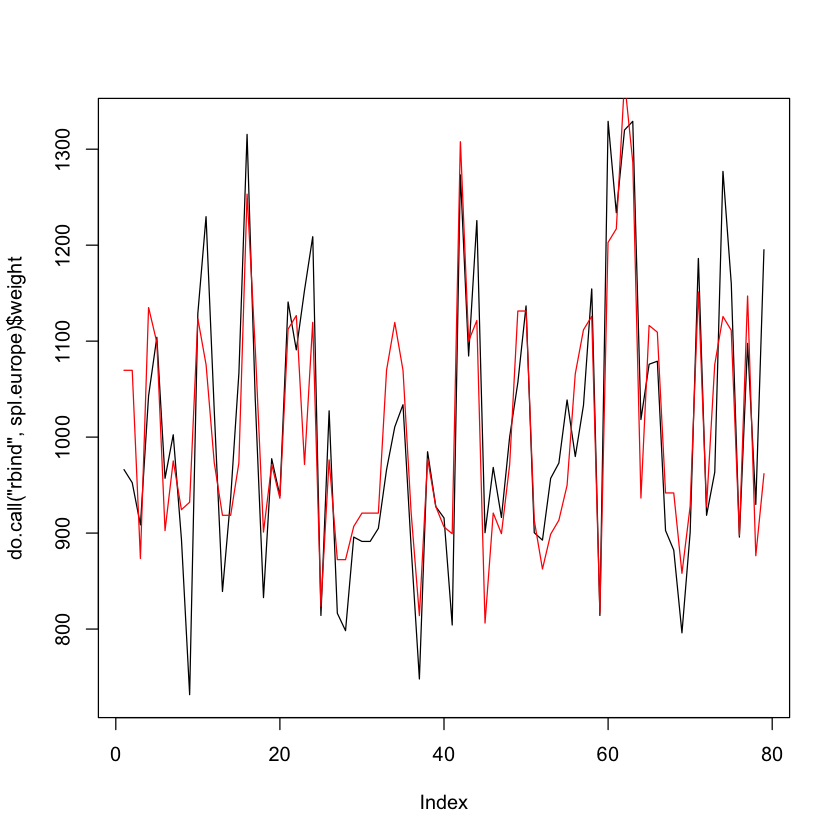

In [26]:
# Hacemos un plot de los valores de weight rales frente a los estimados 
plot(do.call("rbind", spl.europe)$weight, typ = "l")
lines(do.call("c", yest.3), col = "red")

- 3. Calculamos el error

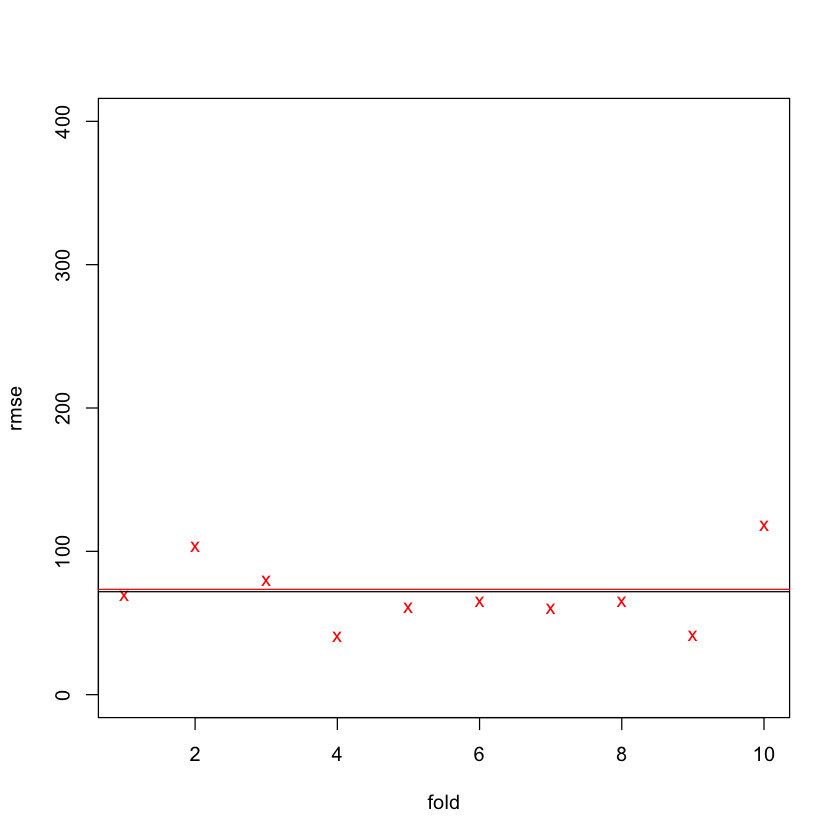

In [27]:
# de cada fold
rmse.val.3.folds <- lapply(1:length(spl.europe), function(x) rmse(spl.europe[[x]]$weight, yest.3[[x]]))
# de la muestra entera
rmse.val.3 <- rmse(do.call("rbind", spl.europe)$weight, do.call("c", yest.3))
plot(do.call("c", rmse.val.3.folds), ylab = "rmse", xlab = "fold", pch = "x", ylim = c(0, 400), col = "red")
abline(h = rmse.val.3, col = "red")
abline(h = rmse(obs = europe$weight, yest))